In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv(r"E:\Python course\12\loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [10]:
print (df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [11]:
print(df.dtypes)

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [14]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [22]:
df["person_gender"].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [25]:
df["person_gender"].value_counts(normalize=True) * 100

person_gender
male      55.202222
female    44.797778
Name: proportion, dtype: float64

Text(0, 0.5, 'person_gende')

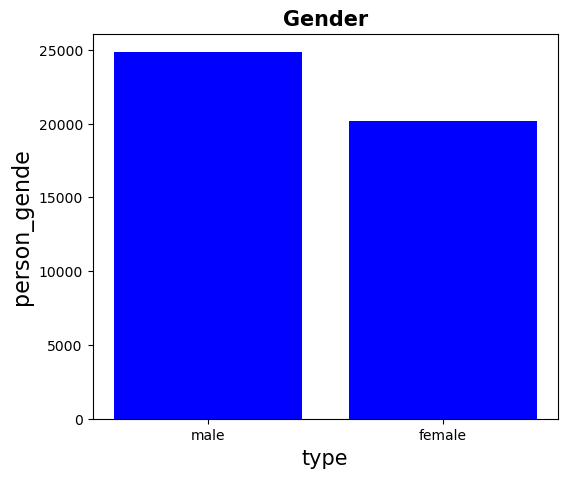

In [60]:
counts=df["person_gender"].value_counts()
plt.figure(figsize=(6,5))
plt.bar(counts.index, counts.values,  color="blue")
plt.title("Gender", fontsize=15, fontweight="bold")
plt.xlabel("type", fontsize=15) 
plt.ylabel("person_gende", fontsize=16)

In [ ]:

plt.xlabel("Counts", fontsize=12)                                     # تسمية محور X
plt.ylabel("Payment Method", fontsize=12)                              # تسمية محور Y
plt.show()                                                             # عرض الرسم البياني

In [26]:
df[["person_age"]].describe()

,person_age
count,45000.000000
mean,27.764178
std,6.045108
min,20.000000
25%,24.000000
50%,26.000000
75%,30.000000
max,144.000000


In [38]:
Q1=df["person_age"].quantile(0.25)
Q3=df["person_age"].quantile(0.75)
IQR = Q3-Q1
outliers = df[
    (df["person_age"] < Q1 - 1.5 * IQR) |
    (df["person_age"] >  Q3 + 1.5 * IQR)
    ]
outliers

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
29120,40.0,female,Bachelor,1440915.0,19,MORTGAGE,10000.0,MEDICAL,11.01,0.01,16.0,637,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44916,42.0,female,High School,100310.0,21,OTHER,12000.0,EDUCATION,16.16,0.12,14.0,665,No,1
44923,47.0,male,Associate,46637.0,24,RENT,13000.0,MEDICAL,11.70,0.28,18.0,705,No,1
44947,42.0,male,Doctorate,705960.0,21,MORTGAGE,20686.0,PERSONAL,10.74,0.03,16.0,689,No,1
44972,43.0,male,Associate,184295.0,20,MORTGAGE,25000.0,EDUCATION,20.00,0.14,15.0,720,No,1


<function matplotlib.pyplot.show(close=None, block=None)>

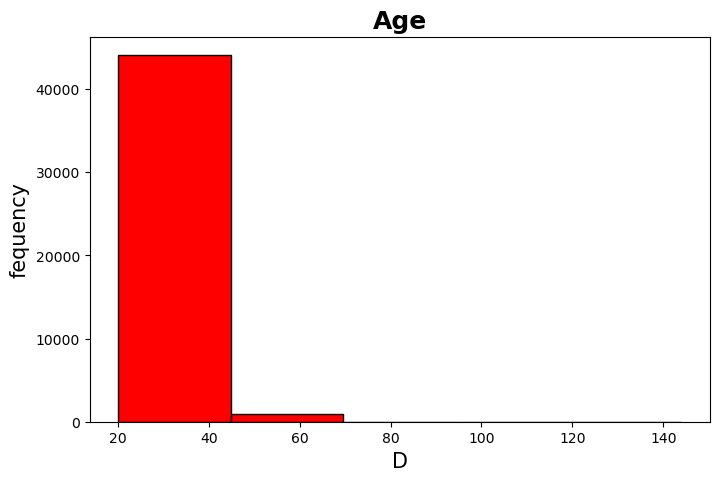

In [57]:
counts = df["person_age"].value_counts()
plt.figure(figsize=(8,5)) 
plt.hist(df["person_age"], bins=5, color="red", edgecolor="black")
plt.title("Age", fontsize=18, fontweight="bold")
plt.xlabel("D", fontsize= 15)
plt.ylabel("fequency", fontsize=15)
plt.show